# Optimization using SciPy

### Simple Optimization (Minimum and Maximum)

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np

- Define a function: $f(x) = x^2+10\sin(x)$

In [3]:
def f(x):
    return x**2 + 10*np.sin(x)

In [4]:
x = np.linspace(-10, 10, 51)
x

array([-10. ,  -9.6,  -9.2,  -8.8,  -8.4,  -8. ,  -7.6,  -7.2,  -6.8,
        -6.4,  -6. ,  -5.6,  -5.2,  -4.8,  -4.4,  -4. ,  -3.6,  -3.2,
        -2.8,  -2.4,  -2. ,  -1.6,  -1.2,  -0.8,  -0.4,   0. ,   0.4,
         0.8,   1.2,   1.6,   2. ,   2.4,   2.8,   3.2,   3.6,   4. ,
         4.4,   4.8,   5.2,   5.6,   6. ,   6.4,   6.8,   7.2,   7.6,
         8. ,   8.4,   8.8,   9.2,   9.6,  10. ])

In [5]:
y = f(x)
y

array([ 105.44021111,   93.90326781,   82.41110086,   71.59082807,
         62.01401092,   54.10641753,   48.08080328,   43.90332136,
         41.29886649,   39.79450795,   38.79415498,   37.67266638,
         35.87454656,   33.00164609,   28.87602074,   23.56802495,
         17.38520443,   10.82374143,    4.4901185 ,   -0.99463181,
         -5.09297427,   -7.43573603,   -7.88039086,   -6.53356091,
         -3.73418342,    0.        ,    4.05418342,    7.81356091,
         10.76039086,   12.55573603,   13.09297427,   12.51463181,
         11.1898815 ,    9.65625857,    8.53479557,    8.43197505,
          9.84397926,   13.07835391,   18.20545344,   25.04733362,
         33.20584502,   42.12549205,   51.18113351,   59.77667864,
         67.43919672,   73.89358247,   79.10598908,   83.28917193,
         86.86889914,   90.41673219,   94.55978889])

<IPython.core.display.Javascript object>


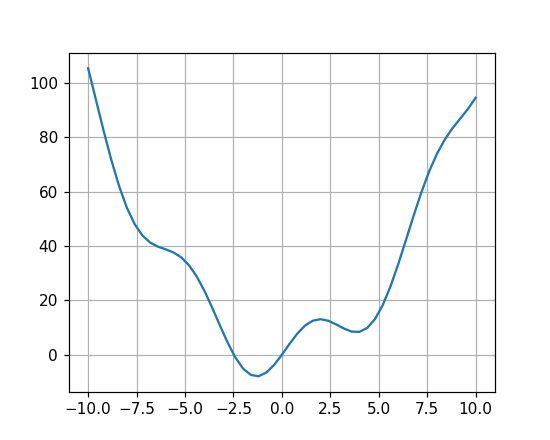

In [6]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.grid('on')
plt.show()

In [7]:
import scipy.optimize as opt

- Find a minimum of the function `f(x)` using the BFGS (Broyden–Fletcher–Goldfarb–Shanno) method, starting from a initial point `x0 = 0`.

In [8]:
[xopt, fopt, gopt, Bopt, func_calls, grad_calls, warnflg] = \
    opt.fmin_bfgs(f,  # Objective function to be minimized.
              x0=0,  # Initial guess.
              maxiter=2000,  # Maximum number of iterations to perform.
              full_output=True)  # Return fopt, func_calls, grad_calls, and warnflag in addition to xopt.

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6


In [9]:
xopt

array([-1.30644012])

In [10]:
fopt

-7.945823375615215

<IPython.core.display.Javascript object>


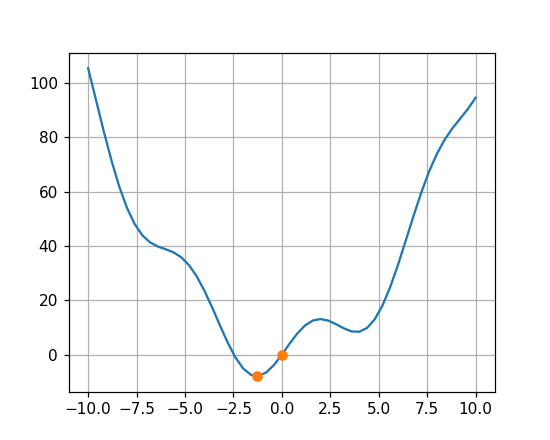

In [11]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.plot([x0, xopt], [f(x0), fopt], 'o')
plt.grid('on')
plt.show()

- What if we start from x0 = 6?

In [12]:
[xopt, fopt, gopt, Bopt, func_calls, grad_calls, warnflg] = \
    opt.fmin_bfgs(f,  # Objective function to be minimized.
              x0=6,  # Initial guess.
              maxiter=2000,  # Maximum number of iterations to perform.
              full_output=True)  # Return fopt, func_calls, grad_calls, and warnflag in addition to xopt.

Optimization terminated successfully.
         Current function value: 8.315586
         Iterations: 7
         Function evaluations: 24
         Gradient evaluations: 8


In [13]:
xopt

array([ 3.83746709])

In [14]:
fopt

8.315585579477458

<IPython.core.display.Javascript object>


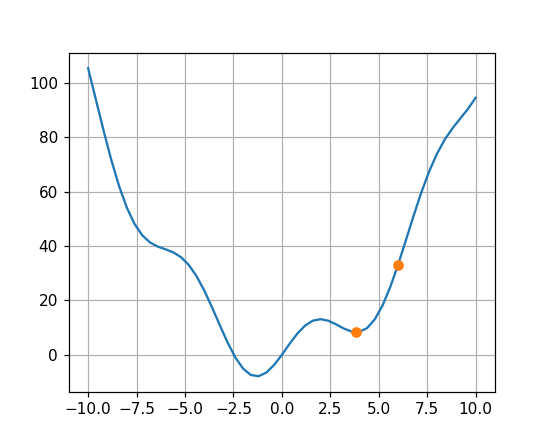

In [15]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.plot([x0, xopt], [f(x0), fopt], 'o')
plt.grid('on')
plt.show()

- Find the global minimum using the basinhopping method.

In [16]:
res = \
    opt.basinhopping(f, 
                     x0=6, 
                     T=1,  # The “temperature” parameter
                     stepsize=2)  # Initial step size
res

                        fun: -7.945823375615284
 lowest_optimization_result:       fun: -7.945823375615284
 hess_inv: array([[ 0.08582505]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644001])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1893
                        nit: 100
                       njev: 631
                          x: array([-1.30644001])

<IPython.core.display.Javascript object>


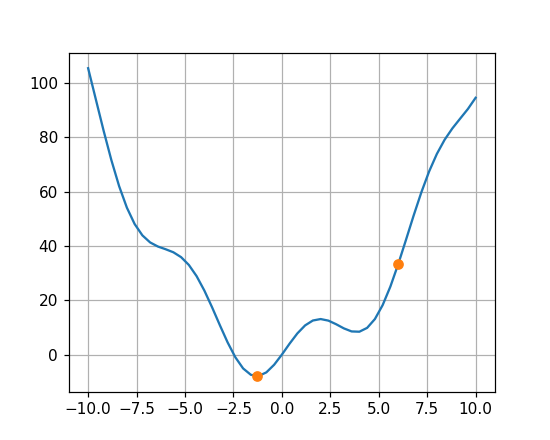

In [17]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.plot([x0, res.x], [f(x0), res.fun], 'o')
plt.grid('on')
plt.show()

### Solving Equations

- Solve the equation $f(x)=x^2+10\sin(x)=0$.

In [18]:
x0 = 1
xopt = opt.fsolve(f, x0)  # Find a root with initial guess x0
xopt

array([ 0.])

<IPython.core.display.Javascript object>


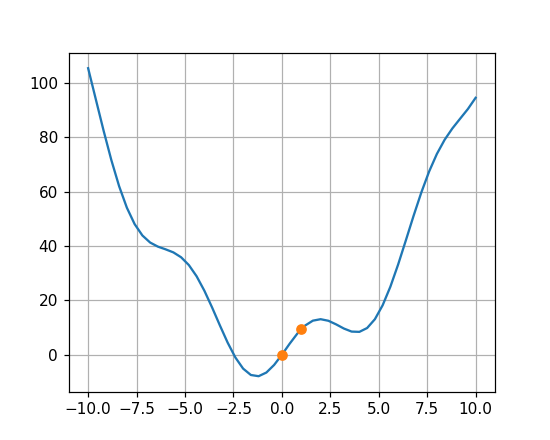

In [19]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.plot([x0, xopt], [f(x0), f(xopt)], 'o')
plt.grid('on')
plt.show()

In [20]:
x0 = -3
xopt = opt.fsolve(f, x0)  # Find a root with initial guess x0
xopt

array([-2.47948183])

<IPython.core.display.Javascript object>


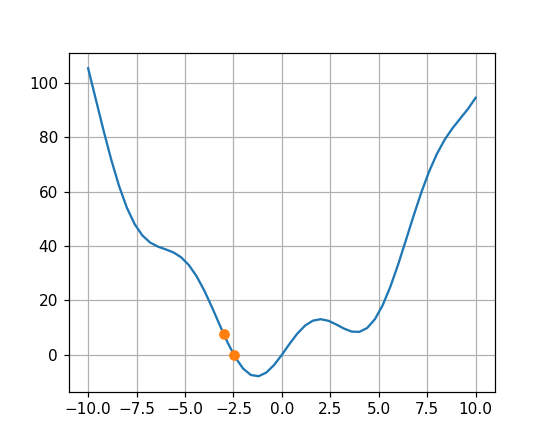

In [21]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.plot([x0, xopt], [f(x0), f(xopt)], 'o')
plt.grid('on')
plt.show()

### Curve Fitting

- Curve fitting is a procedure for finding the best-fitting curve to a given set of points by minimizing the sum of the squares of the offsets ("the residuals") of the points from the curve.
<img src="images/curve_fitting_1.png" alt="Curve Fitting 1" style="width: 150px;"/>
<img src="images/curve_fitting_2.png" alt="Curve Fitting 2" style="width: 150px;"/>
<img src="images/curve_fitting_3.png" alt="Curve Fitting 3" style="width: 150px;"/>

In [22]:
x

array([-10. ,  -9.6,  -9.2,  -8.8,  -8.4,  -8. ,  -7.6,  -7.2,  -6.8,
        -6.4,  -6. ,  -5.6,  -5.2,  -4.8,  -4.4,  -4. ,  -3.6,  -3.2,
        -2.8,  -2.4,  -2. ,  -1.6,  -1.2,  -0.8,  -0.4,   0. ,   0.4,
         0.8,   1.2,   1.6,   2. ,   2.4,   2.8,   3.2,   3.6,   4. ,
         4.4,   4.8,   5.2,   5.6,   6. ,   6.4,   6.8,   7.2,   7.6,
         8. ,   8.4,   8.8,   9.2,   9.6,  10. ])

In [23]:
y

array([ 105.44021111,   93.90326781,   82.41110086,   71.59082807,
         62.01401092,   54.10641753,   48.08080328,   43.90332136,
         41.29886649,   39.79450795,   38.79415498,   37.67266638,
         35.87454656,   33.00164609,   28.87602074,   23.56802495,
         17.38520443,   10.82374143,    4.4901185 ,   -0.99463181,
         -5.09297427,   -7.43573603,   -7.88039086,   -6.53356091,
         -3.73418342,    0.        ,    4.05418342,    7.81356091,
         10.76039086,   12.55573603,   13.09297427,   12.51463181,
         11.1898815 ,    9.65625857,    8.53479557,    8.43197505,
          9.84397926,   13.07835391,   18.20545344,   25.04733362,
         33.20584502,   42.12549205,   51.18113351,   59.77667864,
         67.43919672,   73.89358247,   79.10598908,   83.28917193,
         86.86889914,   90.41673219,   94.55978889])

<IPython.core.display.Javascript object>


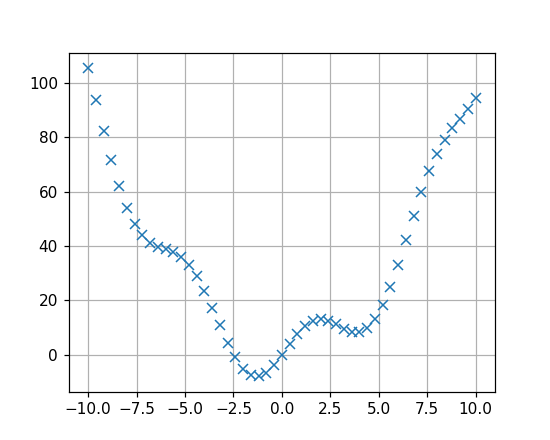

In [24]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y, 'x')
plt.grid('on')
plt.show()

In [25]:
y_noise = f(x) + 5*np.random.randn(x.size)  # Add some random noise
y_noise

array([  1.03457785e+02,   8.97406836e+01,   7.97785575e+01,
         6.76473138e+01,   6.12192361e+01,   5.08694221e+01,
         5.07722106e+01,   4.05017863e+01,   4.09795106e+01,
         4.15408167e+01,   3.23262382e+01,   3.68077684e+01,
         4.43972594e+01,   3.50782869e+01,   2.33319601e+01,
         1.72732535e+01,   8.55894527e+00,   1.33357309e+01,
        -2.98480827e-01,   3.01586497e+00,  -1.15243602e+01,
        -9.71644070e+00,  -1.42046084e+01,  -7.64174137e+00,
         1.21883055e+00,  -1.18307325e+01,   4.62306231e+00,
         7.70328480e-02,   8.23718901e+00,   1.58194817e+01,
         9.70234365e-01,   2.06757669e+01,   8.64891320e+00,
         1.26431292e+01,   4.79356747e+00,   6.34999571e+00,
         6.39013164e+00,   1.27183086e+01,   1.57679299e+01,
         2.87625563e+01,   3.47489930e+01,   3.92128168e+01,
         5.68044207e+01,   5.79755892e+01,   6.97832380e+01,
         7.59662867e+01,   7.86654436e+01,   9.26900797e+01,
         8.33300198e+01,

<IPython.core.display.Javascript object>


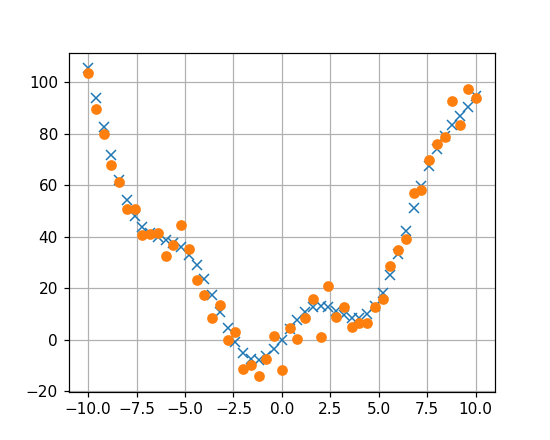

In [26]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y, 'x')
plt.plot(x, y_noise, 'o')
plt.grid('on')
plt.show()

- Fit a function $f_2(x)=ax^2+b\sin(x)$ by determining the optimal values of the coefficients `a` and `b`.

In [27]:
def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

In [28]:
guess = [2, 2]  # Initial guess for a and b, respectively
params, cov = opt.curve_fit(f2, x, y_noise, guess)
params

array([  0.9959799 ,  10.59477851])

In [29]:
a = params[0]
b = params[1]
y_fit = f2(x, a, b)
y_fit

array([ 105.36177324,   93.63646128,   81.93826952,   70.93161541,
         61.22205565,   53.26068216,   47.27290453,   43.22286283,
         40.8190891 ,   39.56052372,   38.81562174,   37.92205989,
         36.29130291,   33.5015203 ,   29.36418408,   23.95383322,
         17.59630559,   10.8172953 ,    4.25935717,   -1.41953856,
         -5.64988523,   -8.04055238,   -8.44053662,   -6.96280176,
         -3.9664443 ,    0.        ,    4.28515787,    8.23765603,
         11.30895873,   13.13996947,   13.61772444,   12.89322701,
         11.35760767,    9.58037306,    8.21949343,    7.9175236 ,
          9.20015768,   12.39323353,   17.57129012,   24.54579948,
         32.89493111,   42.03014974,   51.28913212,   60.04033328,
         67.7826936 ,   74.22474513,   79.33062793,   83.32575161,
         86.66120807,   89.94255401,   93.8342069 ])

<IPython.core.display.Javascript object>


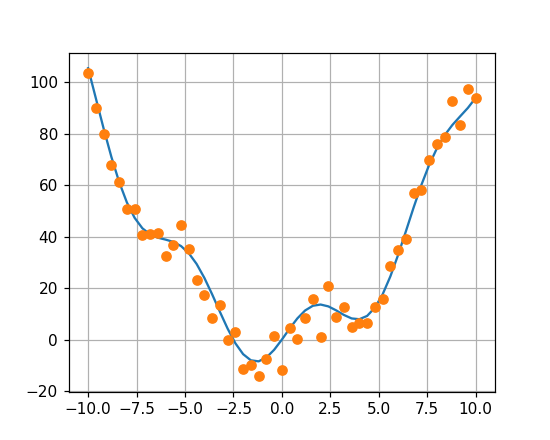

In [30]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y_fit)
plt.plot(x, y_noise, 'o')
plt.grid('on')
plt.show()

### Course Materials on YouTube and GitHub

- Course videos are hosted by YouTube ( http://youtube.com/yongtwang ).
- Course documents (Jupyter Notebooks and Python source code) are hosted by GitHub ( http://github.com/yongtwang ).